# INFO7374 Algorithmic Digital Marketing Fall 2021, Northeastern University

## Project: Global Superstore Marketing Analytics

### Team 3: Sushmitha Jogula - 001546751 and Shreya Bhosale - 001584541

## About the Project

Global Superstore is a leading and one of the largest ecommerce marketplaces connecting businesses across several channels without any hassle. It is considered as one of the best places to advertise, market, purchase and sell goods/properties to genuine individuals. We intend to analyze the sales data of Global Superstore and generate insights about their customers and their behavior based on several factors such as their purchase history, frequency of specific items in their order history, location, shopping price range, payment type etc. This information can be used by the marketing team of Global Superstore to make data-driven decisions generating better profits and revenues to identify best, average and worst customers and the company can create promotional campaigns to attract and retain the customers, to provide product recommendations to customers based on their order history, predict future sales etc.

## Product Recommendation System

We aim to build a simple implementation of a product recommendation system algorithm. We want to be able to find similar items and make recommendations for the Global Superstore customers based on items, users and what items a customer has interacted with. 

We aim to use the two following algorithm implementations to achieve our above objective:
- Alternating Least Squares (ALS)
- Doc2Vec

### Importing the required libraries

In [219]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
import json
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
import timeit
import gensim
import multiprocessing as mp
from tqdm import tqdm_notebook as tqdm
from gensim.models import KeyedVectors
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing

### Loading the dataset from csv

In [273]:
store_df = pd.read_csv('rec_dataset.csv')
store_df

,Review Score,product_id,order_id,customer_id,Customer Segment,product_name,aisle,department,Product Category,Purchase Timestamp
0,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,0A16hif4408hi8b5e8haab9g2e6c68egbh,15438Ai50gb6b20b86e3d6d4j659dggfcb330a,Regular Customers,Utility Lighter,more household,household,more household,13/09/17 8:59
1,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,7229A16f9ah9a36a2i60256i99j385fa9a39f,22529A41jdd13f34ih6c0dd7e567agf7j477h7,Lost Customers,Utility Lighter,more household,household,more household,28/06/17 11:52
2,4,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,31508A2ijf9ic7g5c5id9255c6i59ha9h6gj12,17139Aa72dgj9hc9h66f180hff2agcfgf94f8d,Regular Customers,Utility Lighter,more household,household,more household,18/05/18 10:25
3,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,42252A6f4he26dda1c0120ca2ae65hd42de0i8,33008A3efheaiha8acbjcg3c706a0c21jgj227,Loyal Customers,Utility Lighter,more household,household,more household,01/08/17 18:38
4,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,47321Aeea76e6h5h03h81hghf2h4hg5h7e6ebf,41377A0j7i50ga4a7jha5hib2c7476agd5dgb5,Core Best Customers,Utility Lighter,more household,household,more household,10/08/17 21:48
...,...,...,...,...,...,...,...,...,...,...
100846,1,14949Af2h8gadi7ja5h8j5142306cc7i9i1556,94603Agf68f66ei54870a59je5gj6gigfc7i2g,3664A26e55c31b2g0bhjghfbg68gha41j76fb,Regular Customers,California Pinot Noir Red Wine,missing,missing,Hand Luggage,09/12/17 13:51
100847,4,4042Ahdi3b7aad60429ghhcga7d4g450d2hhf,87800Afdd030ehf7249ef22921bf3g89ei0c74,10847Afj6724cafd25i8d2329ibijadbci5f3i,Almost Lost Customers,Chicken Curry with Seasoned Basmati Rice,frozen meals,frozen,frozen meals,13/07/17 11:24
100848,3,8881Ae60d2ai60d0272593cd331h1fd5d79f8,88387A4862d4a8bc3dhabecc5gcb46305chb7d,32799Afbbg463gh8cjc7ea0g48i5605dfg95a4,Regular Customers,16inch Macbook Pro -2.6GHz Intel Core i7,ice cream ice,frozen,Apple Macbook,27/07/18 10:44
100849,5,13612Adb638d46a227e3d0f411fc2389c1eei5,90090Ag3ecb2gc0d6772b4ce0c8803a630e89d,40805A2d94a8jfd3f0a02i286550ea79d2g048,Regular Customers,Roja Parfumes Luxe 3.4 oz,candy chocolate,snacks,Perfumes,21/08/18 11:29


In [238]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100851 entries, 0 to 100850
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Review Score        100851 non-null  int64 
 1   product_id          100851 non-null  object
 2   order_id            100851 non-null  object
 3   customer_id         100851 non-null  object
 4   Customer Segment    100851 non-null  object
 5   product_name        100851 non-null  object
 6   aisle               100851 non-null  object
 7   department          100851 non-null  object
 8   Product Category    100851 non-null  object
 9   Purchase Timestamp  100851 non-null  object
dtypes: int64(1), object(9)
memory usage: 7.7+ MB


In [239]:
#viewing the customer segments

store_df['Customer Segment'].unique()

array(['Regular Customers', 'Lost Customers', 'Loyal Customers',
       'Core Best Customers', 'Premium Payers/Whales',
       'Slipping Customers', 'Almost Lost Customers'], dtype=object)

## Alternating Least Squares (ALS)

Alternating Least Squares (ALS) is an implicit recommendation algorithm to make a recommendation of products and product categories to the users. ALS is an iterative optimization process where for every iteration it tries to arrive closer and closer to a factorized representation of the original data. We will be using the approach of Collaborative Filtering in this case.

We will be using Implicit data in this case. Implicit data is data we gather from the users behaviour, with no ratings or specific actions needed such as items purchased by user, number of times they played a song or watched a movie, how much time they have spent reading a article etc. The advantage is that we have a lot more of this data, the downside is that it’s more noisy and not always apparent what it means.

The concept of Matrix Factorization is used here. The idea is basically to take a large (or potentially huge) matrix and factor it into some smaller representation of the original matrix. 

In [274]:
features = ['customer_id', 'product_name', 'product_id', 'Review Score']
store_df = store_df[features]
store_df = store_df.rename(columns={'Review Score': 'Review_Score'})
store_df = store_df.drop_duplicates()

In [224]:
store_df

,customer_id,product_name,product_id,Review_Score
0,15438Ai50gb6b20b86e3d6d4j659dggfcb330a,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
1,22529A41jdd13f34ih6c0dd7e567agf7j477h7,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
2,17139Aa72dgj9hc9h66f180hff2agcfgf94f8d,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,4
3,33008A3efheaiha8acbjcg3c706a0c21jgj227,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
4,41377A0j7i50ga4a7jha5hib2c7476agd5dgb5,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
...,...,...,...,...
100846,3664A26e55c31b2g0bhjghfbg68gha41j76fb,California Pinot Noir Red Wine,14949Af2h8gadi7ja5h8j5142306cc7i9i1556,1
100847,10847Afj6724cafd25i8d2329ibijadbci5f3i,Chicken Curry with Seasoned Basmati Rice,4042Ahdi3b7aad60429ghhcga7d4g450d2hhf,4
100848,32799Afbbg463gh8cjc7ea0g48i5605dfg95a4,16inch Macbook Pro -2.6GHz Intel Core i7,8881Ae60d2ai60d0272593cd331h1fd5d79f8,3
100849,40805A2d94a8jfd3f0a02i286550ea79d2g048,Roja Parfumes Luxe 3.4 oz,13612Adb638d46a227e3d0f411fc2389c1eei5,5


In [275]:
#taking 5000 rows

store_df = store_df[:5000]
store_df.customer_id.unique

<bound method Series.unique of 0       15438Ai50gb6b20b86e3d6d4j659dggfcb330a
1       22529A41jdd13f34ih6c0dd7e567agf7j477h7
2       17139Aa72dgj9hc9h66f180hff2agcfgf94f8d
3       33008A3efheaiha8acbjcg3c706a0c21jgj227
4       41377A0j7i50ga4a7jha5hib2c7476agd5dgb5
                         ...                  
5000    40725A6afhcdf715957eijjji699haa21g7g1j
5001     9892A0a0bbah2c92jd1eb6e56hhhdjee973b2
5002     2034A18aehj30i8948ibb7c6fhf3i0f9ah85a
5003    13934Abb5chaj8g1974c89cd3b3j3h5ahf8657
5004    10824A24100j65b74ci513e0a3a2d3e94e17i1
Name: customer_id, Length: 5000, dtype: object>

In [276]:
product_features_df = store_df.reset_index().pivot_table(
    index='customer_id',
    columns='product_id',
    values='Review_Score'
).fillna(0)

# creating scipy sparse matrix from a dataframe of product features
product_features_matrix = csr_matrix(product_features_df.values)

In [227]:
product_features_df.head()

product_id,14691Acifcad272bcf1a23c71cdb3ci24i7hgj,20672A3bi81f4d94181a083d6919df1be9i1af,24469Aj3c18e8adide5c510a8jhgbbga0chj47,4922A553fdaf0b3b1f0bj80dge9e40cj9f684,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,852Ac36edjf451j470d5jfb80gag5f6h3b43
customer_id,,,,,,
10626Ag1d3507iijg8j733f338536i85j26470,0.0,0.0,0.0,2.0,0.0,0.0
10699A2jhagdbffh87fijb511ahicfh8d7gf56,0.0,0.0,0.0,0.0,0.0,4.0
10834Ah9ii800961760jh8hjgg34e03dg9dif4,0.0,0.0,0.0,0.0,0.0,5.0
10878Ac2ce9d9hf1aj1392i0cd3i396d2j8g45,0.0,0.0,0.0,0.0,0.0,5.0
1096A5c3978e9d0jj1jc4f922c09h2a70474a,0.0,0.0,0.0,0.0,0.0,2.0


In [228]:
product_features_matrix

<94x6 sparse matrix of type '<class 'numpy.float64'>'
	with 99 stored elements in Compressed Sparse Row format>

In [277]:
#get the transpose of product_features_df dataframe

X = product_features_df.T
X.head()

customer_id,10000A4b2i71fdc928fhjb7j7j23g65egff766,10002A0cba8dhh4298j851h45d3gdg8897d282,10004Ae0bj0djf8f37ba0087j1ji1j1969gbea,10008A7f8hbc6g2jbahif427a8aci796fh3694,10010Aj5fa7dc49g9jf09cf84ehjd0272a4807,10012A8d15b9j40h8he563hf0gfi2j7g7h2f16,1001A3g64d3j741dg4aj642eeh7a555321d6b,10021A3bcfd9ie4665bg7ba58h3a1ea008gfi4,10024Ae06f5fcbd3gffa0e4cgh5cgjgiebj7ci,10029Ai1g6aad188b7ih07i20chi70hh258j46,...,9928A9c2ifh4233h735j65h343a2cajgg887c,9932Ahjc02ed27g47e2i367a4f0ac64egii3c,9938A2j3g3g99dej9ee8ibb5giig87e2hc1h9,993A1gbibcgjc14dh7i06d791hfa60i0i827,9948A6bbd55hde4707ec4bda6h9506h691hd6,9976A261dce806d6bb13ec6f00fg4dhib72ie,9979Ab0936bg85ae5d1jc36424gg3c7e1igh6,9981Achf43555h120g2j2d6212bc6684e6g6c,9992Agb302e606f45cgb6ig0ihe0f697d22bh,9A59c0j7c480748c6c5e7c11cc19aaf58j
product_id,,,,,,,,,,,,,,,,,,,,,
10241Ag6ja6hjbh9651h5ca8009jjjf71hjde7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10579Agafaeh2jgdd29ei48h76f3ij6b8i08g5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10603Adgbjg981j9bbd1ff3gbfhfc6b4c9idfj,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10766A08jjg0i2c09aegbd799ef63iagg746fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
10794A44hehf4g5h0a8ab22aif7ah2eifc4h5g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
# Performing Dimensionality reduction using truncated SVD, reduce to 2 dimensions
SVD = TruncatedSVD(n_components=10)
decomp_matrix = SVD.fit_transform(X)
print('Shape of decomp_matrix = ',decomp_matrix.shape)

# Return Pearson product-moment correlation coefficients
corr_matrix = np.corrcoef(decomp_matrix)
print('Shape of corr_matrix = ',corr_matrix.shape)

Shape of decomp_matrix =  (190, 10)
Shape of corr_matrix =  (190, 190)


In [279]:
#getting most popular product for customer

fav_product = store_df.groupby(['customer_id']).max()['product_id'].to_frame()
fav_product = fav_product.reset_index()
fav_product

,customer_id,product_id
0,10000A4b2i71fdc928fhjb7j7j23g65egff766,6927Afi479gdihejd4djdcb789cbb6g403eg4
1,10002A0cba8dhh4298j851h45d3gdg8897d282,13423Afe9ad5g0b5ib69gdd9f5bgbhj35bfci5
2,10004Ae0bj0djf8f37ba0087j1ji1j1969gbea,10603Adgbjg981j9bbd1ff3gbfhfc6b4c9idfj
3,10008A7f8hbc6g2jbahif427a8aci796fh3694,6927Afi479gdihejd4djdcb789cbb6g403eg4
4,10010Aj5fa7dc49g9jf09cf84ehjd0272a4807,7943A7556j8h80c4hec7j4d2cdij32eibgbfe
...,...,...
4564,9976A261dce806d6bb13ec6f00fg4dhib72ie,17289Ag3i790308c919e1d5a3bfh0edh0cj5ha
4565,9979Ab0936bg85ae5d1jc36424gg3c7e1igh6,10766A08jjg0i2c09aegbd799ef63iagg746fe
4566,9981Achf43555h120g2j2d6212bc6684e6g6c,6927Afi479gdihejd4djdcb789cbb6g403eg4
4567,9992Agb302e606f45cgb6ig0ihe0f697d22bh,26445A2j901a57743jj159cf56jcde76a3ijg3


In [280]:
#method to get product_id of popular product for customer

def get_product_id(customer_id):
    
    prod_id = fav_product[fav_product.customer_id == customer_id]['product_id']
    return prod_id
        
prd_id = get_product_id('10000A4b2i71fdc928fhjb7j7j23g65egff766')
Product_id = prd_id.iloc[0]
Product_id

'6927Afi479gdihejd4djdcb789cbb6g403eg4'

In [281]:
prod_name = list(X.index)
prod_id_index = prod_name.index(Product_id)
prod_id_index

169

In [282]:
corr_product_id = corr_matrix[prod_id_index]
corr_product_id.shape

(190,)

#### Recommendation of top 10 sequential highly correlated products to customers

In [283]:
recommend = list(X.index[corr_product_id > 0.60])

# Removes the item already bought by the customer
recommend.remove(Product_id) 

#Getting Product names from prediction 
predictions = pd.DataFrame(recommend[:10])
predictions.columns = ['Product_ID']
predictions

,Product_ID
0,12217Aigd3cf29hj41e7f027c49b70ch1f9cca
1,16507A8i6i587e5837ddbgi1i960c2ih259537
2,16929Aa037ic9321gjgh6j5ejga066gejddcha
3,19683Abehjjif5gjd56gaf5be09e9gfh9708i6
4,1969A5f48i6b6gi670e1d70i68fbb7d17dca0
5,20672A3bi81f4d94181a083d6919df1be9i1af
6,22511Aj84bc54bg02c604c39b951e97046672h
7,25067A60b6683d459483d2chia6c1hgd6e30fe
8,25850A40085807ba81db976eea74b2d7cc02i2
9,7927Af2gde7jh5df3jed2dfi30d320jej5ejh


In [284]:
predictions['Product_Name'] = predictions.Product_ID.apply(lambda x : store_df[store_df.product_id == x]['product_name'].unique()[0])
predictions[:20]

,Product_ID,Product_Name
0,12217Aigd3cf29hj41e7f027c49b70ch1f9cca,Quantum AA Batteries
1,16507A8i6i587e5837ddbgi1i960c2ih259537,Organic Superfoods Carrot Rice Cakes
2,16929Aa037ic9321gjgh6j5ejga066gejddcha,Dried Shiitake Mushrooms
3,19683Abehjjif5gjd56gaf5be09e9gfh9708i6,"Glue, All Purpose, Precision Tip"
4,1969A5f48i6b6gi670e1d70i68fbb7d17dca0,Plain Cream Cheese
5,20672A3bi81f4d94181a083d6919df1be9i1af,Vegan Alfredo Sauce Arugula Pesto
6,22511Aj84bc54bg02c604c39b951e97046672h,Plain Breadsticks
7,25067A60b6683d459483d2chia6c1hgd6e30fe,Lactose Free Cheesy Bliss American Style Singles
8,25850A40085807ba81db976eea74b2d7cc02i2,Vegan Low Fat Spicy Southwestern Ranch Salad D...
9,7927Af2gde7jh5df3jed2dfi30d320jej5ejh,No Touch Hand Soap Unit


In [285]:
store_df.to_csv('store_df_ALS.csv', index=False)

In [286]:
X.to_csv('X_ALS.csv')

In [287]:
with open('correlation_matrix_ALS.txt', 'w') as filehandle:
    json.dump(corr_matrix.tolist(), filehandle)

#### Product Prediction

In [288]:
store_df = pd.read_csv('store_df_ALS.csv')
store_df

,customer_id,product_name,product_id,Review_Score
0,15438Ai50gb6b20b86e3d6d4j659dggfcb330a,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
1,22529A41jdd13f34ih6c0dd7e567agf7j477h7,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
2,17139Aa72dgj9hc9h66f180hff2agcfgf94f8d,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,4
3,33008A3efheaiha8acbjcg3c706a0c21jgj227,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
4,41377A0j7i50ga4a7jha5hib2c7476agd5dgb5,Utility Lighter,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,5
...,...,...,...,...
4995,40725A6afhcdf715957eijjji699haa21g7g1j,Eye Irritation Relief Optique 1 Homeopathic Me...,20527Aacd5bh6a16bcd8g97fcj69fi572da9aj,5
4996,9892A0a0bbah2c92jd1eb6e56hhhdjee973b2,Eye Irritation Relief Optique 1 Homeopathic Me...,20527Aacd5bh6a16bcd8g97fcj69fi572da9aj,2
4997,2034A18aehj30i8948ibb7c6fhf3i0f9ah85a,Eye Irritation Relief Optique 1 Homeopathic Me...,20527Aacd5bh6a16bcd8g97fcj69fi572da9aj,5
4998,13934Abb5chaj8g1974c89cd3b3j3h5ahf8657,Organic High Heat Sunflower Spray Oil,4503A81e3dc000e7acf62hj480eje3ddb68jb,4


In [289]:
X = pd.read_csv('X_ALS.csv', index_col=0)
X

,10000A4b2i71fdc928fhjb7j7j23g65egff766,10002A0cba8dhh4298j851h45d3gdg8897d282,10004Ae0bj0djf8f37ba0087j1ji1j1969gbea,10008A7f8hbc6g2jbahif427a8aci796fh3694,10010Aj5fa7dc49g9jf09cf84ehjd0272a4807,10012A8d15b9j40h8he563hf0gfi2j7g7h2f16,1001A3g64d3j741dg4aj642eeh7a555321d6b,10021A3bcfd9ie4665bg7ba58h3a1ea008gfi4,10024Ae06f5fcbd3gffa0e4cgh5cgjgiebj7ci,10029Ai1g6aad188b7ih07i20chi70hh258j46,...,9928A9c2ifh4233h735j65h343a2cajgg887c,9932Ahjc02ed27g47e2i367a4f0ac64egii3c,9938A2j3g3g99dej9ee8ibb5giig87e2hc1h9,993A1gbibcgjc14dh7i06d791hfa60i0i827,9948A6bbd55hde4707ec4bda6h9506h691hd6,9976A261dce806d6bb13ec6f00fg4dhib72ie,9979Ab0936bg85ae5d1jc36424gg3c7e1igh6,9981Achf43555h120g2j2d6212bc6684e6g6c,9992Agb302e606f45cgb6ig0ihe0f697d22bh,9A59c0j7c480748c6c5e7c11cc19aaf58j
product_id,,,,,,,,,,,,,,,,,,,,,
10241Ag6ja6hjbh9651h5ca8009jjjf71hjde7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10579Agafaeh2jgdd29ei48h76f3ij6b8i08g5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10603Adgbjg981j9bbd1ff3gbfhfc6b4c9idfj,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10766A08jjg0i2c09aegbd799ef63iagg746fe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
10794A44hehf4g5h0a8ab22aif7ah2eifc4h5g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9442A443bj6467c4e7367h8e1256h62h09674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9451Aa43h0c4b287j8gd7212h8j33bch82j8i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9532Aee0eac87deiciccb6gd3ed6dh8d818ie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
with open('correlation_matrix_ALS.txt') as f:
    corr_matrix = json.load(f)
corr_matrix = np.array(corr_matrix)

#### Product Recommendation System using ALS implemented on Streamlit

In [291]:
def product_recommendations_ALS(Customer_id):
    fav_product = store_df.groupby(['customer_id']).max()['product_id'].to_frame()
    fav_product = fav_product.reset_index()
    
    prd_id = fav_product[fav_product.customer_id == Customer_id]['product_id']
    product_id = prd_id.iloc[0]
    prod_name = list(X.index)
    product_id_index = prod_name.index(product_id)
    
    corr_product_ID = corr_matrix[product_id_index]
    
    recommend = list(X.index[corr_product_ID > 0.60])
    recommend.remove(product_id) 

    prod_predictions = pd.DataFrame(recommend[:10])
    prod_predictions.columns = ['Product_ID']

    prod_predictions['Product Name'] = prod_predictions.Product_ID.apply(lambda x : store_df[store_df.product_id == x]['product_name'].unique()[0])
    Recommendations = predictions[:3]
    return Recommendations

In [292]:
prod_recommendations = product_recommendations_ALS('15438Ai50gb6b20b86e3d6d4j659dggfcb330a')
prod_recommendations[:5]

,Product_ID,Product_Name
0,12217Aigd3cf29hj41e7f027c49b70ch1f9cca,Quantum AA Batteries
1,16507A8i6i587e5837ddbgi1i960c2ih259537,Organic Superfoods Carrot Rice Cakes
2,16929Aa037ic9321gjgh6j5ejga066gejddcha,Dried Shiitake Mushrooms


## Doc2Vec Implementation

The goal of doc2vec is to create a numeric representation of a document, regardless of its length. Numeric representation of text documents is a challenging task in machine learning. Such a representation may be used for many purposes, for example: document retrieval, web search, spam filtering, topic modeling etc. Doc2vec is a very nice technique. It’s easy to use, gives good results, and as you can understand from its name, heavily based on word2vec, which used to generate representation vectors out of words.

We can use this method for recommending products to the customer segment of 'Loyal Customers' who purchase products recently and frequently. Doc2Vec is a good method for loyal customers as these customers usually repeat their orders and buy frequently. 

We learn a semantic representation for Customers using their previous purchase history. We can apply the doc2vec model to our dataset in this manner: Each customer is a document, orders are sentences, and products are words. 

In [293]:
prev_orders = pd.read_csv('rec_dataset.csv')
prev_orders

,Review Score,product_id,order_id,customer_id,Customer Segment,product_name,aisle,department,Product Category,Purchase Timestamp
0,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,0A16hif4408hi8b5e8haab9g2e6c68egbh,15438Ai50gb6b20b86e3d6d4j659dggfcb330a,Regular Customers,Utility Lighter,more household,household,more household,13/09/17 8:59
1,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,7229A16f9ah9a36a2i60256i99j385fa9a39f,22529A41jdd13f34ih6c0dd7e567agf7j477h7,Lost Customers,Utility Lighter,more household,household,more household,28/06/17 11:52
2,4,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,31508A2ijf9ic7g5c5id9255c6i59ha9h6gj12,17139Aa72dgj9hc9h66f180hff2agcfgf94f8d,Regular Customers,Utility Lighter,more household,household,more household,18/05/18 10:25
3,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,42252A6f4he26dda1c0120ca2ae65hd42de0i8,33008A3efheaiha8acbjcg3c706a0c21jgj227,Loyal Customers,Utility Lighter,more household,household,more household,01/08/17 18:38
4,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,47321Aeea76e6h5h03h81hghf2h4hg5h7e6ebf,41377A0j7i50ga4a7jha5hib2c7476agd5dgb5,Core Best Customers,Utility Lighter,more household,household,more household,10/08/17 21:48
...,...,...,...,...,...,...,...,...,...,...
100846,1,14949Af2h8gadi7ja5h8j5142306cc7i9i1556,94603Agf68f66ei54870a59je5gj6gigfc7i2g,3664A26e55c31b2g0bhjghfbg68gha41j76fb,Regular Customers,California Pinot Noir Red Wine,missing,missing,Hand Luggage,09/12/17 13:51
100847,4,4042Ahdi3b7aad60429ghhcga7d4g450d2hhf,87800Afdd030ehf7249ef22921bf3g89ei0c74,10847Afj6724cafd25i8d2329ibijadbci5f3i,Almost Lost Customers,Chicken Curry with Seasoned Basmati Rice,frozen meals,frozen,frozen meals,13/07/17 11:24
100848,3,8881Ae60d2ai60d0272593cd331h1fd5d79f8,88387A4862d4a8bc3dhabecc5gcb46305chb7d,32799Afbbg463gh8cjc7ea0g48i5605dfg95a4,Regular Customers,16inch Macbook Pro -2.6GHz Intel Core i7,ice cream ice,frozen,Apple Macbook,27/07/18 10:44
100849,5,13612Adb638d46a227e3d0f411fc2389c1eei5,90090Ag3ecb2gc0d6772b4ce0c8803a630e89d,40805A2d94a8jfd3f0a02i286550ea79d2g048,Regular Customers,Roja Parfumes Luxe 3.4 oz,candy chocolate,snacks,Perfumes,21/08/18 11:29


In [294]:
#considering only Loyal Customers in this case and restricting the number to 500

prev_orders = prev_orders[prev_orders['Customer Segment'] == 'Loyal Customers']
prev_orders_customers= prev_orders.customer_id.unique()
prev_orders_customers = prev_orders_customers[:100]

In [295]:
#creating a new dataframe by checking if customer_id of prev_orders in prev_orders_customers

prev_orders_details = prev_orders[prev_orders.customer_id.isin(prev_orders_customers)].copy()
prev_orders_details.head()

,Review Score,product_id,order_id,customer_id,Customer Segment,product_name,aisle,department,Product Category,Purchase Timestamp
3,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,42252A6f4he26dda1c0120ca2ae65hd42de0i8,33008A3efheaiha8acbjcg3c706a0c21jgj227,Loyal Customers,Utility Lighter,more household,household,more household,01/08/17 18:38
6,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,71176A162fb7j5j462a016198ja132egdhda1j,7413A20gg81agjd10abj84b9c574gijefed7j,Loyal Customers,Utility Lighter,more household,household,more household,18/03/18 21:00
7,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,76489Ade28e7h3412620696cc03bjc84gge7ja,27116Aga90if42d9g424093687b0i00ha6ifdg,Loyal Customers,Utility Lighter,more household,household,more household,05/08/17 16:59
14,3,20672A3bi81f4d94181a083d6919df1be9i1af,26929A5af3c8a1d51i9ac1jjjg7a5h8dbj961i,993A1gbibcgjc14dh7i06d791hfa60i0i827,Loyal Customers,Vegan Alfredo Sauce Arugula Pesto,MunchPak,dry goods pasta,MunchPak,04/10/17 9:10
15,5,14691Acifcad272bcf1a23c71cdb3ci24i7hgj,74521A26b3e5c0393g0536g64053hca62b91ci,33008A3efheaiha8acbjcg3c706a0c21jgj227,Loyal Customers,Disposal Cleaner,cleaning products,household,cleaning products,06/01/18 19:17


In [296]:
# Creating basic user features i.e. relative purchase frequences in each depertment and aisle

#creating department feature
dept_feat = pd.pivot_table(prev_orders_details, index=['customer_id'], values=['product_id'], columns=['department'], aggfunc='count', fill_value=0)
dept_feat = dept_feat.div(dept_feat.sum(axis=1), axis=0)
dept_feat.columns = dept_feat.columns.droplevel(0)
dept_feat = dept_feat.reset_index()

#creating aisle feature
aisle_feat = pd.pivot_table(prev_orders_details, index=['customer_id'], values=['product_id'], columns=['aisle'], aggfunc='count', fill_value=0)
aisle_feat = aisle_feat.div(aisle_feat.sum(axis=1), axis=0)
aisle_feat.columns = aisle_feat.columns.droplevel(0)
aisle_feat = aisle_feat.reset_index()

#merging department feature and aisle feature
feature_df = dept_feat.merge(aisle_feat, how='left', on='customer_id').set_index('customer_id')

feature_df

,alcohol,babies,bakery,beverages,breakfast,canned goods,dairy eggs,deli,dry goods pasta,frozen,...,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trash bags liners,vitamins supplements,water seltzer sparkling water,yogurt
customer_id,,,,,,,,,,,,,,,,,,,,,
10339Ajghe568d0c8i5ag2ich25e61g40e34bd,0.0,0.250000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10433Aa2f1916af7fae6a4j9693ih4h1jie427,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10434A48747j643a29ae87b19hb8a602jcji8g,0.0,0.000000,0.0,0.25,0.0,0.000000,0.000000,0.00,0.000000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10626Ag1d3507iijg8j733f338536i85j26470,0.0,0.000000,0.0,0.00,0.0,0.333333,0.000000,0.00,0.000000,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10699A2jhagdbffh87fijb511ahicfh8d7gf56,0.0,0.333333,0.0,0.00,0.0,0.000000,0.333333,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570A9i49b6b22afcde3gc2di322jbbid2505,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9665Ah7ff0hb569ijhd06af74j5e7i833f9a6,0.0,0.000000,0.0,0.00,0.0,0.000000,0.333333,0.00,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9880A2gc7g807ec7che8071b5ad41he0gh29c,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.50,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step 1: Data Preparation and Initial Data Preprocessing and Cleaning

In [297]:
prev_orders["product_id"] = prev_orders["product_id"].astype(str)

#sorting order and products in orders chronologically
prev_orders.sort_values(by=['customer_id','order_id'], inplace=True)
prev_orders

/var/folders/s8/vkjbrgf56n320fjhc6_kry900000gp/T/ipykernel_3864/1030342747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prev_orders["product_id"] = prev_orders["product_id"].astype(str)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Review Score,product_id,order_id,customer_id,Customer Segment,product_name,aisle,department,Product Category,Purchase Timestamp
73039,4,22892A4h926e0087d2aigb46bd1eecea8feg0c,37351A962297i54h1e2332a289j7ie988c8bjj,10003A67ifg122fjeb40bgc5i5h4h91fjcifg2,Loyal Customers,Fresh Invisible Solid Anti-Perspirant Deodorant,deodorants,personal care,deodorants,19/10/17 13:21
77212,5,17283A393c725jiiaihj7d88d5eaaijg269011,64437A26dcjb4i9ab346b982e8df3910gh06j6,10003A67ifg122fjeb40bgc5i5h4h91fjcifg2,Loyal Customers,Pearl Plastic Light Absorbency Unscented Tampons,feminine care,personal care,feminine care,20/06/18 22:07
27587,5,19221Ad004390jc651aijdaf6gfb550b5gfb10,7908A87j4646381df8698a9bb92jd3j882hc9,10003A67ifg122fjeb40bgc5i5h4h91fjcifg2,Loyal Customers,Buttery Sticks,butter,dairy eggs,butter,09/03/17 20:06
79933,5,2783A46g6a5hcjg1icfah1jgf26h56dc4fij3,11872Aiea6jj54j0h0j66ab857fe6c7ei3igf2,10007Ad1g0h6d5f1f5hh46965959024gi1178g,Loyal Customers,Traditional Crostini,crackers,snacks,crackers,17/11/17 19:53
78844,5,8146A5b92037cbh1gei60dd2gb28d75j0g4e3,20083Ace117bac04a15606e7gcheb3c9681jf3,10007Ad1g0h6d5f1f5hh46965959024gi1178g,Loyal Customers,Giant Chile Picante v,chips pretzels,snacks,chips pretzels,01/10/17 17:42
...,...,...,...,...,...,...,...,...,...,...
30904,5,15970A5eede2ff5c23a189eddje379860224e2,7081A93eaf3j4460f87hd6e700beji3h2f00h,998Ac11jg4cj30ab62fhi15i303003110b62,Loyal Customers,Premium Roasted Beef Base,soup broth bouillon,canned goods,soup broth bouillon,13/01/18 13:21
29997,5,6913A30h395bd4fadc9e38j86g74738egh5h8,95651Af35a8hfa3a2iiha7d64ae5cbe2297927,998Ac11jg4cj30ab62fhi15i303003110b62,Loyal Customers,Mashed Potatoes Sour Cream & Chives,frozen appetizers sides,frozen,frozen appetizers sides,19/04/18 20:35
49284,5,11342A5fc3jh89i6bgfd74i8664f47b5c0d6fd,14091Ah2di4bjj8g176j606g6d433b66f1jggg,9997Ai99482fied5e5fj0i6jg9eh4cbd33j7b,Loyal Customers,Blueberry Sparkling Water,yogurt,dairy eggs,Protein,01/05/17 20:08
50999,5,7247Ah7d2hge2ba5daeb2bh8faja7iddi5b65,17887Aj60igfaf0i1554j2f8g8e30jaah182b6,9997Ai99482fied5e5fj0i6jg9eh4cbd33j7b,Loyal Customers,Organic Boneless Skinless Chicken Thighs,packaged poultry,meat seafood,packaged poultry,25/05/18 20:26


In [298]:
#joining all the order_id's made by a customer_id

allorders_by_custid = prev_orders.groupby("customer_id").apply(lambda order: ' '.join(order['product_id'].tolist()))

allorders_by_custid = pd.DataFrame(allorders_by_custid,columns=['all_orders'])
allorders_by_custid.reset_index(inplace=True)
allorders_by_custid.customer_id = allorders_by_custid.customer_id.astype(str)

allorders_by_custid

,customer_id,all_orders
0,10003A67ifg122fjeb40bgc5i5h4h91fjcifg2,22892A4h926e0087d2aigb46bd1eecea8feg0c 17283A3...
1,10007Ad1g0h6d5f1f5hh46965959024gi1178g,2783A46g6a5hcjg1icfah1jgf26h56dc4fij3 8146A5b9...
2,10010Aj5fa7dc49g9jf09cf84ehjd0272a4807,7943A7556j8h80c4hec7j4d2cdij32eibgbfe 7479Agg5...
3,10014Aa474efabh488fiib42866a26g8agff85,28076A4ce1dff4g1i63087hieb4eia7e9h18jh 12771A7...
4,10015Aabj0a048e75ahce0geeb09eci58cieia,28210Abfc4h775hd2ei54e21c531a0061adceb 30664Af...
...,...,...
5330,9961Aha0bi9f0hge5bfh269e07i155dhcgigb,23827A2e9dha3eg7dji2ci8614fg5171i62g7h 21284Ad...
5331,9979Ab0936bg85ae5d1jc36424gg3c7e1igh6,10766A08jjg0i2c09aegbd799ef63iagg746fe 5065A37...
5332,9983A85ci3987h8he7d14g8i0gdb5chb67h8f,9764A572i2i96fea1jaa4cj23ha045fche1f5 28228A0j...
5333,998Ac11jg4cj30ab62fhi15i303003110b62,7271A263caie44994h62bj65a9ehf39daj80j 14545A25...


#### 2. Training the Doc2Vec model

In [301]:
TRAIN_USER_MODEL = True   
MODEL_DIR = 'models'

dim_embeddings = 100    # dimensionality of user representation

filename = '/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/Project/models/customer2vec.{dim_embeddings}d.model'
if TRAIN_USER_MODEL:

    class TaggedDocumentIterator(object):
        def __init__(self, df):
           self.df = df
        def __iter__(self):
            for row in self.df.itertuples():
                yield TaggedDocument(words=dict(row._asdict())['all_orders'].split(),tags=[dict(row._asdict())['customer_id']])

    it = TaggedDocumentIterator(allorders_by_custid)

    doc_model = gensim.models.Doc2Vec(vector_size=dim_embeddings, 
                                      window=5, 
                                      min_count=10, 
                                      workers=mp.cpu_count(),
                                      alpha=0.055, 
                                      min_alpha=0.055,
                                      epochs=15)   # use fixed learning rate

    train_corpus = list(it)

    doc_model.build_vocab(train_corpus)

    for epoch in tqdm(range(10)):
        doc_model.alpha -= 0.005                    # decrease the learning rate
        doc_model.min_alpha = doc_model.alpha       # fix the learning rate, no decay
        doc_model.train(train_corpus, total_examples=doc_model.corpus_count, epochs=doc_model.epochs)
        #print('Iteration:', epoch)

    doc_model.save(filename)
    print('Model saved to [{filename}]')
    
else:
    doc_model = Doc2Vec.load(filename)
    print('Model loaded from [{filename}]')

/var/folders/s8/vkjbrgf56n320fjhc6_kry900000gp/T/ipykernel_3864/1251961874.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

Model saved to [{filename}]


In [202]:
doc_model

In [300]:
print(gensim.__version__)

3.8.1


In [302]:
vocab_doc = list(doc_model.docvecs.doctags.keys())
doc_vector_dict = {arg:doc_model.docvecs[arg] for arg in vocab_doc}
X_doc = pd.DataFrame(doc_vector_dict).T.values

#### Step 3: Visualize the Customer Semantic Space Using t-SNE

In [303]:
user_ids_sample_str = set([str(id) for id in prev_orders_customers])
idx = []
for i, user_id in enumerate(doc_vector_dict):
    if user_id in user_ids_sample_str:
        idx.append(i)
X_doc_subset = X_doc[idx] 
X_doc_subset.shape

(100, 100)

In [304]:
doc_vec_subset = pd.DataFrame(doc_vector_dict).T.iloc[idx]
doc_vec_subset

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
10339Ajghe568d0c8i5ag2ich25e61g40e34bd,-0.104642,0.201877,0.016161,-0.053201,0.167825,-0.050467,-0.015466,0.113782,0.047857,-0.110388,...,-0.034059,-0.032590,-0.256091,-0.091847,-0.089505,0.186360,0.079914,0.046794,0.038369,-0.099347
10433Aa2f1916af7fae6a4j9693ih4h1jie427,-0.003204,0.004699,-0.001583,0.003056,0.004669,0.002745,0.003946,0.001005,0.001766,-0.002777,...,0.000315,-0.000211,-0.002655,0.003907,0.003466,-0.004075,0.000732,-0.004933,0.001371,0.000866
10434A48747j643a29ae87b19hb8a602jcji8g,-0.081754,0.178710,0.019705,-0.040428,0.126957,-0.038071,-0.027101,0.115171,0.036100,-0.101582,...,-0.052237,-0.042352,-0.200461,-0.074720,-0.072017,0.171221,0.048862,0.053666,0.007804,-0.059178
10626Ag1d3507iijg8j733f338536i85j26470,-0.229313,-0.096011,0.149804,0.198786,0.273430,-0.043905,0.047054,-0.070992,0.221377,-0.030558,...,0.232426,-0.072983,0.001528,-0.059997,0.138561,0.100405,-0.209500,0.125178,0.029290,0.010818
10699A2jhagdbffh87fijb511ahicfh8d7gf56,-0.217348,-0.057098,0.132483,-0.040508,0.212052,-0.186670,-0.096579,-0.137332,0.235986,-0.250149,...,-0.108732,-0.172847,-0.161191,-0.045141,-0.098997,-0.027815,-0.024309,0.228684,0.058855,0.205833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570A9i49b6b22afcde3gc2di322jbbid2505,-0.166594,0.366418,0.061780,-0.123278,0.178968,-0.061885,-0.186275,0.059821,0.346773,-0.308095,...,-0.057518,0.176324,-0.397119,0.014745,0.021243,0.389247,0.081074,0.045949,0.014679,0.002406
9665Ah7ff0hb569ijhd06af74j5e7i833f9a6,-0.014092,0.146150,0.175919,0.164526,0.042077,-0.010157,-0.299098,0.130088,-0.018152,-0.131379,...,0.126115,0.059413,-0.283715,-0.082436,0.085082,0.308818,0.221058,0.011371,0.328184,-0.039253
9880A2gc7g807ec7che8071b5ad41he0gh29c,-0.001324,0.004930,-0.001241,-0.000840,-0.002012,0.004691,-0.003712,-0.004113,0.000156,0.001376,...,-0.003703,-0.001589,0.003375,0.004701,-0.000254,0.000912,0.004417,-0.001875,0.002053,-0.000019
9885Aaa2ij11757g71hggi838033h2i363b41,0.000771,-0.004597,0.001499,-0.001985,0.003309,0.001670,-0.002498,-0.003288,-0.000943,0.001001,...,-0.003013,0.002239,-0.004505,0.004301,-0.000544,0.004168,0.004082,-0.001851,0.001750,0.000120


In [305]:
# TSNE stands for T-distributed Stochastic Neighbor Embedding. t-SNE is a tool to visualize high-dimensional data.

distance_matrix_doc = pairwise_distances(X_doc_subset, X_doc_subset, metric='cosine', n_jobs=-1)
tsne_doc = TSNE(metric="precomputed", n_components=2, verbose=1, perplexity=30, n_iter=500)
tsne_results_doc = tsne_doc.fit_transform(distance_matrix_doc)

/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.194480
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.688972
[t-SNE] KL divergence after 500 iterations: 0.335936


In [306]:
tsne_doc = pd.DataFrame()
tsne_doc['tsne-2d-one'] = tsne_results_doc[:,0]
tsne_doc['tsne-2d-two'] = tsne_results_doc[:,1]

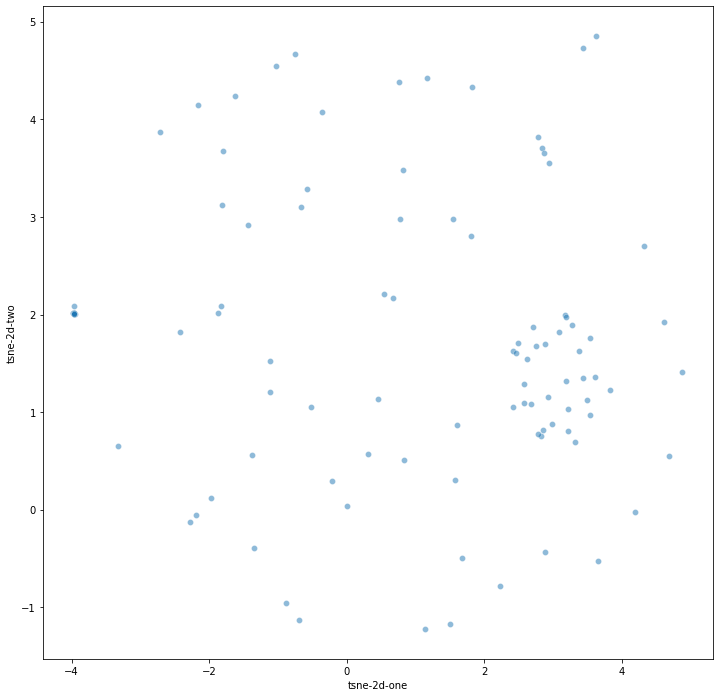

In [307]:
#Visualizing the Customer Semantic Space

plt.figure(figsize=(12,12))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=tsne_doc,
    legend="full",
    alpha=0.5
)
plt.show()

#### Step 4: Segmentation in the Customer Semantic Space Using t-SNE

silhouette_score method is used to compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 

In [308]:
def cosine_cluster(X, k):
    # normalization is equivalent to cosine distance
    return KMeans(n_clusters=k).fit(preprocessing.normalize(X_doc_subset)).labels_.astype(float)

silhouette_list = []
for k in tqdm(range(2, 15, 1)):
    latent_clusters = cosine_cluster(X_doc_subset, k)
    silhouette_avg = silhouette_score(X_doc_subset, latent_clusters, metric="cosine")
    silhouette_list.append(silhouette_avg)
    print(f'Silhouette score for {k} clusters is : {silhouette_avg:.4}')

/var/folders/s8/vkjbrgf56n320fjhc6_kry900000gp/T/ipykernel_3864/3040886346.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(range(2, 15, 1)):


  0%|          | 0/13 [00:00<?, ?it/s]

Silhouette score for 2 clusters is : 0.3425
Silhouette score for 3 clusters is : 0.3883
Silhouette score for 4 clusters is : 0.4337
Silhouette score for 5 clusters is : 0.4388
Silhouette score for 6 clusters is : 0.4406
Silhouette score for 7 clusters is : 0.444
Silhouette score for 8 clusters is : 0.4558
Silhouette score for 9 clusters is : 0.4525
Silhouette score for 10 clusters is : 0.4467
Silhouette score for 11 clusters is : 0.4585
Silhouette score for 12 clusters is : 0.4716
Silhouette score for 13 clusters is : 0.4653
Silhouette score for 14 clusters is : 0.4753


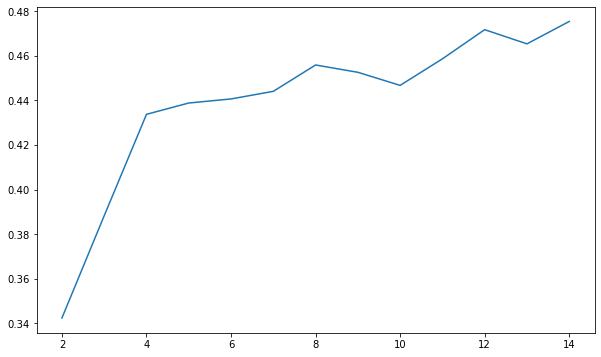

In [309]:
#Plotting the silhouette_list values

plt.figure(figsize=(10,6))
plt.plot(range(2,15,1), silhouette_list)

In [310]:
N_CLUSTER = 7

latent_clusters = cosine_cluster(X_doc_subset, N_CLUSTER)
doc_vec_end = doc_vec_subset.copy()
doc_vec_end['label'] = latent_clusters
tsne_doc['cluster'] = latent_clusters

doc_vec_end['label'].value_counts()

1.0    51
0.0    13
3.0    11
2.0     9
6.0     7
4.0     5
5.0     4
Name: label, dtype: int64

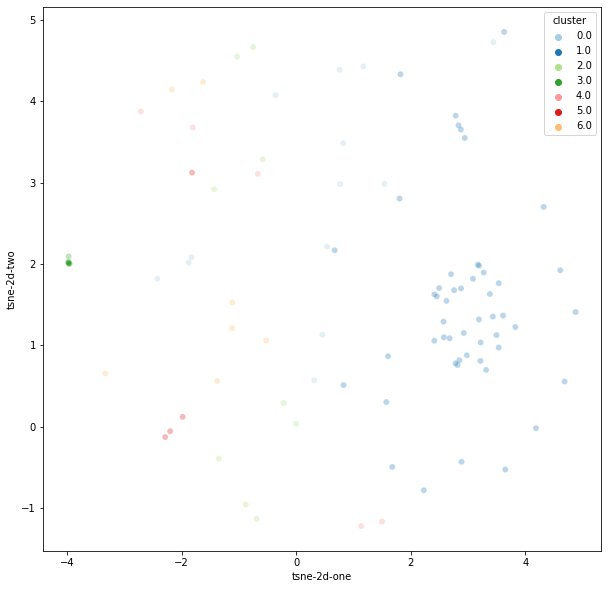

In [311]:
#Visualizing clusters

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='cluster',
    palette=sns.color_palette("Paired", tsne_doc['cluster'].nunique()),
    data=tsne_doc,
    legend="full",
    alpha=0.3
);
plt.show();

In [312]:
feature_df['latent_cluster'] = latent_clusters

dept_names = np.setdiff1d(prev_orders_details['department'].unique(), ['other', 'missing'])
interpret_department = feature_df.groupby('latent_cluster')[dept_names].mean()

interpret_department.T.div(interpret_department.sum(axis=1)).round(3)

latent_cluster,0.0,1.0,2.0,3.0,4.0,5.0,6.0
alcohol,0.026,0.000,0.000,0.030,0.000,0.000,0.048
babies,0.054,0.023,0.029,0.030,0.133,0.000,0.036
bakery,0.041,0.037,0.000,0.030,0.000,0.000,0.071
beverages,0.026,0.052,0.000,0.061,0.067,0.000,0.000
breakfast,0.000,0.005,0.000,0.030,0.000,0.000,0.036
canned goods,0.026,0.007,0.000,0.079,0.000,0.000,0.048
dairy eggs,0.067,0.052,0.108,0.344,0.117,0.250,0.048
deli,0.077,0.017,0.029,0.000,0.050,0.125,0.167
dry goods pasta,0.019,0.037,0.078,0.000,0.000,0.083,0.167
frozen,0.077,0.061,0.167,0.097,0.000,0.000,0.071


In [313]:
interpetation_aisle = feature_df.groupby('latent_cluster')[feature_df.columns.values[16:-1]].mean()
interpetation_aisle.T.div(interpetation_aisle.sum(axis=1)).round(3).head(20)

latent_cluster,0.0,1.0,2.0,3.0,4.0,5.0,6.0
personal care,0.073,0.080,0.090,0.086,0.093,0.152,0.000
pets,0.000,0.003,0.000,0.000,0.000,0.000,0.040
produce,0.021,0.219,0.000,0.000,0.000,0.000,0.000
snacks,0.094,0.045,0.098,0.070,0.107,0.121,0.111
Candy Club,0.000,0.003,0.000,0.000,0.000,0.000,0.000
FitSnack,0.000,0.009,0.000,0.000,0.000,0.000,0.000
MunchPak,0.000,0.004,0.030,0.000,0.000,0.061,0.061
Snakku,0.021,0.000,0.000,0.000,0.000,0.000,0.000
ZenPop,0.016,0.004,0.000,0.000,0.000,0.000,0.000
air fresheners candles,0.000,0.007,0.000,0.000,0.040,0.000,0.000


#### Getting product recommendations based on customer_id for Loyal Customers

In [314]:
prev_orders_details_clust = prev_orders_details.copy()
prev_orders_details_clust = prev_orders_details_clust.merge(feature_df['latent_cluster'], on='customer_id', how='left')

for cluster_id in [1.0, 2.0, 4.0, 3.0]:
    prev_orders_details_clust[prev_orders_details_clust['latent_cluster']==cluster_id][['customer_id', 'product_name']].groupby("customer_id").apply(lambda order: ' > '.join(order['product_name'])).reset_index().head(10)

In [315]:
prev_orders_details_all = prev_orders_details_clust
prev_orders_details_all

,Review Score,product_id,order_id,customer_id,Customer Segment,product_name,aisle,department,Product Category,Purchase Timestamp,latent_cluster
0,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,42252A6f4he26dda1c0120ca2ae65hd42de0i8,33008A3efheaiha8acbjcg3c706a0c21jgj227,Loyal Customers,Utility Lighter,more household,household,more household,01/08/17 18:38,3.0
1,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,71176A162fb7j5j462a016198ja132egdhda1j,7413A20gg81agjd10abj84b9c574gijefed7j,Loyal Customers,Utility Lighter,more household,household,more household,18/03/18 21:00,4.0
2,5,8446Ajajdi16a137i3b05i7d3g0e1dfh9d29d,76489Ade28e7h3412620696cc03bjc84gge7ja,27116Aga90if42d9g424093687b0i00ha6ifdg,Loyal Customers,Utility Lighter,more household,household,more household,05/08/17 16:59,2.0
3,3,20672A3bi81f4d94181a083d6919df1be9i1af,26929A5af3c8a1d51i9ac1jjjg7a5h8dbj961i,993A1gbibcgjc14dh7i06d791hfa60i0i827,Loyal Customers,Vegan Alfredo Sauce Arugula Pesto,MunchPak,dry goods pasta,MunchPak,04/10/17 9:10,6.0
4,5,14691Acifcad272bcf1a23c71cdb3ci24i7hgj,74521A26b3e5c0393g0536g64053hca62b91ci,33008A3efheaiha8acbjcg3c706a0c21jgj227,Loyal Customers,Disposal Cleaner,cleaning products,household,cleaning products,06/01/18 19:17,3.0
...,...,...,...,...,...,...,...,...,...,...,...
321,4,26793Ac2ae6f7acg860h3f0dib6jgae16b96i8,42447A8c90ec0hf2eg4j6g2fgg14bf0b7af471,10433Aa2f1916af7fae6a4j9693ih4h1jie427,Loyal Customers,Gluten Free Peach Apricot Bars,energy granola bars,snacks,energy granola bars,28/05/18 20:49,2.0
322,3,9103Aba8dj9iacd172d65g112dcbgfi41d39e,2868A70icf87aehe873ajb8gcf70h8g0c4jf7,19327Ae29ih4fi9e0bef1ae01ee4069f4fd6d0,Loyal Customers,Banana Walnut Pound Cake,breakfast bakery,bakery,breakfast bakery,22/08/17 16:50,3.0
323,4,29024A66bh6a8cjdg6ed8j812aje30aegg8bf9,57065Aaf3ac2fi79jbc77gcgi15jbjf8eij0cc,993A1gbibcgjc14dh7i06d791hfa60i0i827,Loyal Customers,Organic Baked Aloha Tofu,tofu meat alternatives,deli,tofu meat alternatives,09/06/18 15:47,6.0
324,5,20426Ag07c42hd7di0jcfedd7bb1a7iig9g3af,72548Aib2dfb02c8fb69aae5jfj54jaha484hg,10699A2jhagdbffh87fijb511ahicfh8d7gf56,Loyal Customers,Snug & Dry Size 6 Diapers,diapers wipes,babies,diapers wipes,18/04/18 19:20,3.0


In [316]:
prev_orders_details_all.to_csv('Recomm_Customer2vec.csv', index=False)

#### Product Recommendations for Loyal Customers implemented on Streamlit

In [318]:
orders_details = pd.read_csv('Recomm_Customer2vec.csv')

recommendations_c2v = orders_details[['customer_id', 'product_name', 'Product Category', 'Review Score']]
recommendations_c2v = recommendations_c2v[recommendations_c2v.customer_id == '10699A2jhagdbffh87fijb511ahicfh8d7gf56']
recommendations_c2v

,customer_id,product_name,Product Category,Review Score
16,10699A2jhagdbffh87fijb511ahicfh8d7gf56,Light String Cheese,packaged cheese,4
324,10699A2jhagdbffh87fijb511ahicfh8d7gf56,Snug & Dry Size 6 Diapers,diapers wipes,5
325,10699A2jhagdbffh87fijb511ahicfh8d7gf56,Facial Cloths,facial care,5
